###**1.Importação de Bibliotecas Essenciais**

Este bloco de código importa as bibliotecas Python que serão utilizadas ao longo da análise de dados e modelagem. São elas:

*   **`pandas` (pd):** Usada para manipulação e análise de dados tabulares (DataFrames).
*   **`numpy` (np):** Essencial para operações numéricas e matemáticas, especialmente com arrays.
*   **`matplotlib.pyplot` (plt):** Fornece uma interface para criar visualizações estáticas, animadas e interativas.
*   **`seaborn` (sns):** Construída sobre o Matplotlib, oferece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
*   **`sklearn` (skl):** A biblioteca Scikit-learn é um conjunto de ferramentas para aprendizado de máquina, incluindo pré-processamento, modelos e métricas de avaliação.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


### **2.Carregamento e Exploração Inicial dos Dados**

Esta célula carrega o conjunto de dados `oceanographic and meteorological dataset.csv` para um DataFrame pandas (`df`).

Após o carregamento, são executados dois comandos para uma exploração inicial:

*   **`df.shape`:** Mostra o número de linhas e colunas do DataFrame, dando uma ideia do tamanho do conjunto de dados.
*   **`df.head(5)`:** Exibe as primeiras 5 linhas do DataFrame, permitindo uma visualização rápida das colunas e dos tipos de dados.

In [2]:
df = pd.read_csv('oceanographic and meteorological dataset.csv')
df.shape
df.head(5)

,time,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop
0,01/01/2025 00:00,-6.306534,14.981308,172.33765,8.959626,4.751488,10.330421,0.019531,0.160156,5.10,7.56,175.07,10.85
1,01/01/2025 01:00,-4.723419,14.342773,171.36377,8.907424,4.758851,10.286964,0.026367,0.164062,NaN,NaN,NaN,NaN
2,01/01/2025 02:00,-3.978439,12.770416,171.11426,8.913869,4.665862,10.272316,0.038086,0.162109,NaN,NaN,NaN,NaN
3,01/01/2025 03:00,-3.164124,15.130005,171.06311,8.911307,4.565788,10.260597,0.053711,0.155273,5.03,7.60,174.16,10.71
4,01/01/2025 04:00,-3.343689,12.074799,171.16702,8.862277,4.541395,10.223000,0.070312,0.143555,NaN,NaN,NaN,NaN


### **3.Análise Descritiva dos Dados**

O método `df.describe()` gera um sumário estatístico das colunas numéricas no DataFrame. Este sumário inclui:

*   **`count`:** Número de valores não nulos.
*   **`mean`:** Média dos valores.
*   **`std`:** Desvio padrão.
*   **`min`:** Valor mínimo.
*   **`25%`, `50%` (mediana), `75%`:** Quartis que dividem os dados em quatro partes iguais.
*   **`max`:** Valor máximo.

Esta função é crucial para entender a distribuição, a centralidade e a dispersão dos dados, bem como para identificar possíveis outliers ou erros.

In [3]:
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202,-0.005831,-0.023458,2.396094,6.664016,260.916772,10.912761
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554,0.108640,0.109127,1.456047,1.374168,99.155991,2.368424
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695,-0.462891,-0.603516,0.620000,3.730000,0.030000,4.760000
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890,-0.082031,-0.090820,1.310000,5.590000,255.900000,9.130000
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711,-0.007812,-0.026367,1.860000,6.530000,294.380000,10.680000
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175,0.063477,0.043945,3.110000,7.620000,326.745000,12.432500
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710,0.558594,0.473633,9.290000,11.420000,359.920000,20.010000


### **4.Informações Detalhadas do DataFrame**

O comando `df.info()` fornece um resumo conciso do DataFrame, incluindo:

*   **Tipo de dados:** O tipo de dados de cada coluna (e.g., `float64`, `object`).
*   **Valores não nulos:** O número de entradas não nulas em cada coluna, útil para identificar colunas com dados em falta.
*   **Uso de memória:** A quantidade de memória que o DataFrame está a consumir.

Esta função é fundamental para verificar os tipos de dados esperados e para ter uma primeira ideia da completude de cada variável.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             7993 non-null   object 
 1   u10_era5         7993 non-null   float64
 2   v10_era5         7993 non-null   float64
 3   mwd_era5         7993 non-null   float64
 4   mwp_era5         7993 non-null   float64
 5   swh_era5         7993 non-null   float64
 6   pp1d_era5        7993 non-null   float64
 7   uo_cop           7993 non-null   float64
 8   vo_cop           7993 non-null   float64
 9   swh_cop          2184 non-null   float64
 10  mwp_cop          2184 non-null   float64
 11  mwd_cop          2184 non-null   float64
 12  peak_period_cop  2184 non-null   float64
dtypes: float64(12), object(1)
memory usage: 811.9+ KB


### **5.Análise de Valores Ausentes**

Este bloco de código calcula e exibe a quantidade e a percentagem de valores ausentes (NaN) em cada coluna do DataFrame. É uma etapa crucial na fase de limpeza de dados, pois a presença de muitos valores ausentes pode impactar a qualidade da análise e a performance dos modelos de Machine Learning.

Os passos são:

1.  **`df.isna().sum()`:** Conta o número de valores `NaN` para cada coluna.
2.  **`missing_percent`:** Calcula a percentagem de valores `NaN` em relação ao total de linhas.
3.  Cria um DataFrame (`missing_df`) para organizar essas informações, ordenando-o pela percentagem de valores ausentes de forma decrescente.
4.  Imprime a tabela completa de valores ausentes e, em seguida, filtra e imprime apenas as variáveis que têm *algum* valor ausente (`missing_nonzero`).

In [5]:


missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Percent', ascending=False)

print("\nValores em falta por variável:")
display(missing_df)

missing_nonzero = missing_df[missing_df['Missing Percent'] > 0]
print("\nVariáveis com valores em falta:")
display(missing_nonzero)


Valores em falta por variável:


,Missing Count,Missing Percent
peak_period_cop,5809,72.676092
swh_cop,5809,72.676092
mwp_cop,5809,72.676092
mwd_cop,5809,72.676092
time,0,0.000000
mwp_era5,0,0.000000
mwd_era5,0,0.000000
v10_era5,0,0.000000
u10_era5,0,0.000000
vo_cop,0,0.000000



Variáveis com valores em falta:


,Missing Count,Missing Percent
peak_period_cop,5809,72.676092
swh_cop,5809,72.676092
mwp_cop,5809,72.676092
mwd_cop,5809,72.676092


### **8.Definição de Features, Targets e Escalamento de Dados**

Este bloco prepara os dados para a modelagem, definindo quais colunas serão usadas como `features` (variáveis de entrada) e `targets` (variáveis a prever), além de realizar o escalamento dos dados.

1.  **Definição de `features_era5` e `features_cop`:**
    *   `features_era5`: Contém as variáveis de vento e ondas do conjunto de dados ERA5.
    *   `features_cop`: Contém as variáveis de corrente e ondas do conjunto de dados Copernicus.
2.  **Definição de `targets`:** As variáveis de onda do Copernicus que se pretende prever.
3.  **Combinação de todas as features:** `all_features` é criada para incluir todas as features de ambas as fontes e os targets. Isso garante que todas as colunas relevantes sejam consideradas no escalamento.
4.  **Escalamento dos Dados (`StandardScaler`):**
    *   `StandardScaler` é usado para normalizar os dados, transformando-os para ter média 0 e desvio padrão 1. Isso é importante para muitos algoritmos de Machine Learning, pois variáveis com escalas muito diferentes podem influenciar desproporcionalmente o modelo.
    *   `df_scaled` é o DataFrame resultante com os dados escalados, utilizando apenas as linhas do `df_sync` (já limpas de NaNs nas variáveis de interesse).
5.  **Análise de Componentes Principais (PCA):**
    *   `PCA(n_components=2)`: Aplica a Análise de Componentes Principais para reduzir a dimensionalidade das features. Neste caso, reduz as `features_era5` e `features_cop` para 2 componentes principais. Isso pode ser útil para visualização ou para reduzir a complexidade de modelos subsequentes.

In [6]:
# =========================================================
# Preparação de dados (limpo e consistente)
# - cria df_sync com colunas necessárias + time ordenado
# - converte direções (graus) para sin/cos (se existirem)
# - define features/targets sem duplicações
# =========================================================

# Garantir df carregado (e idempotência: se df já foi "encolhido", recarregar)
if 'df' not in globals():
    df = pd.read_csv('oceanographic and meteorological dataset.csv')
else:
    # Se já não tiver colunas raw típicas, recarregar para manter a célula re-executável
    if ('mwd_cop' not in df.columns) and ('mwd_cop_sin' in df.columns):
        df = pd.read_csv('oceanographic and meteorological dataset.csv')

# Seleção de colunas base (vamos adaptar dependendo de ter direções em graus ou já em sin/cos)
base_cols = [
    'time',
    # ERA5
    'u10_era5', 'v10_era5', 'swh_era5', 'mwp_era5', 'pp1d_era5',
    # Copernicus
    'uo_cop', 'vo_cop', 'swh_cop', 'mwp_cop', 'peak_period_cop',
]

direction_cols = []
for d in ['mwd_era5', 'mwd_cop']:
    if d in df.columns:
        direction_cols.append(d)
    else:
        # já convertido? então exigir sin/cos
        if f'{d}_sin' in df.columns and f'{d}_cos' in df.columns:
            direction_cols.extend([f'{d}_sin', f'{d}_cos'])

required_raw = [c for c in (base_cols + direction_cols) if c in df.columns]  # <- sem vírgula no fim!

# Remover NaNs apenas nas colunas relevantes (evita perder dados sem necessidade)
df_sync = df.dropna(subset=required_raw).copy()

# Converter time + ordenar (importante para splits/forecast)
if 'time' in df_sync.columns:
    df_sync['time'] = pd.to_datetime(df_sync['time'], format='%d/%m/%Y %H:%M', errors='coerce')
    df_sync = df_sync.dropna(subset=['time']).sort_values('time').reset_index(drop=True)

# --- Direções: graus -> sin/cos ---
for col in ['mwd_era5', 'mwd_cop']:
    if col in df_sync.columns:
        rads = np.deg2rad(df_sync[col].astype(float))
        df_sync[f'{col}_sin'] = np.sin(rads)
        df_sync[f'{col}_cos'] = np.cos(rads)
        df_sync.drop(columns=[col], inplace=True)

print(f"\nDimensões do DataFrame após limpeza: {df_sync.shape}\n")
print("Conversão de direções concluída.\n")

# --- FONTE 1: ERA5 ---
features_era5 = [
    'u10_era5', 'v10_era5',
    'swh_era5',
    'mwd_era5_sin', 'mwd_era5_cos',
    'mwp_era5', 'pp1d_era5'
]

# --- FONTE 2: COPERNICUS (sem targets para evitar leakage) ---
features_cop_base = [
    'uo_cop', 'vo_cop',
    'mwd_cop_sin', 'mwd_cop_cos'
]

# --- TARGETS (ondas Copernicus) ---
targets = ['swh_cop', 'mwp_cop', 'peak_period_cop']

# Features finais (sem duplicações e sem targets)
features = features_cop_base + features_era5

# DataFrame de trabalho para análises subsequentes (colunas únicas)
cols_needed = list(dict.fromkeys(features + targets))
missing_cols = [c for c in cols_needed if c not in df_sync.columns]
if missing_cols:
    raise KeyError(f"Faltam colunas em df_sync após preparação: {missing_cols}")

df_ = df_sync[cols_needed].copy()

# Compatibilidade com células antigas que usam `df`
df = df_sync


Dimensões do DataFrame após limpeza: (2184, 15)

Conversão de direções concluída.



### **10.Visualização da Matriz de Correlação**

Este bloco de código gera um mapa de calor (heatmap) para visualizar a matriz de correlação entre as `features` e os `targets` definidos anteriormente, utilizando o DataFrame `df_sync` (já sem valores ausentes nas colunas de interesse).

*   **`df_sync[features + targets].corr()`:** Calcula a matriz de correlação de Pearson entre todas as colunas combinadas das features e targets.
*   **`sns.heatmap(...)`:** Cria o heatmap. O `annot=True` exibe os valores de correlação em cada célula, e `cmap='RdBu'` com `center=0` ajuda a visualizar correlações positivas (vermelho) e negativas (azul) em relação a um ponto central de zero correlação.

Este gráfico é fundamental para entender as relações lineares entre as variáveis, ajudando a identificar quais features estão mais fortemente correlacionadas com os targets e entre si.

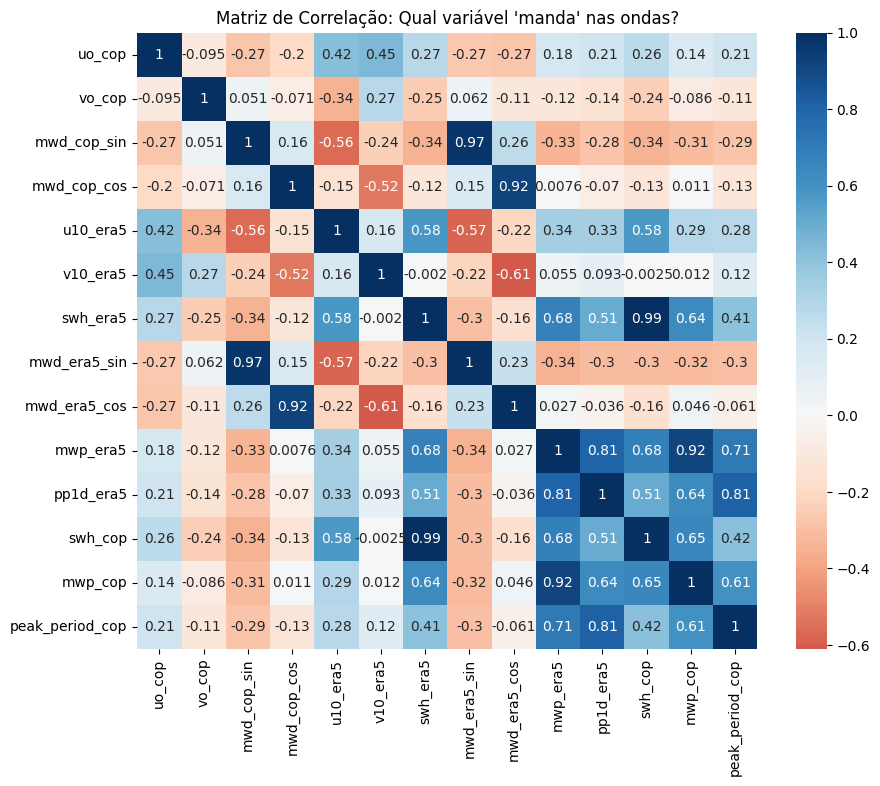

In [7]:
# Matriz de correlação (usa df_sync e apenas colunas existentes)
if 'df_sync' not in globals():
    raise NameError("df_sync não existe. Executa a célula de preparação (Cell 12) primeiro.")

cols = [c for c in (features + targets) if c in df_sync.columns]
if not cols:
    raise ValueError("Não há colunas válidas para correlação. Verifica a célula de preparação.")

plt.figure(figsize=(10, 8))
sns.heatmap(df_sync[cols].corr(), annot=True, cmap='RdBu', center=0)
plt.title("Matriz de Correlação: Qual variável 'manda' nas ondas?")
plt.show()

### **11.Análise de Consistência e Métricas de Comparação: ERA5 vs Copernicus**

Este bloco de código realiza uma análise comparativa detalhada entre as variáveis correspondentes dos conjuntos de dados ERA5 e Copernicus. O objetivo é quantificar quão bem os dados do ERA5 (geralmente usados para previsão ou como reanálise) se alinham com os dados do Copernicus (que podem ser considerados como observações mais diretas ou um modelo operacional de referência).

1.  **`pares`:** Uma lista de tuplos, onde cada tuplo define um par de variáveis a comparar (variável ERA5, variável Copernicus, nome amigável para o relatório).
2.  **Loop para cada par de variáveis:**
    *   Extrai os valores `y_true` (Copernicus) e `y_pred` (ERA5) do `df_sync` (garantindo que não há NaNs).
    *   **Correlação (R):** Calcula a correlação de Pearson, indicando a força e direção da relação linear.
    *   **Bias (Erro Médio):** Calcula a média das diferenças entre a previsão (ERA5) e a verdade (Copernicus), indicando se o ERA5 tende a superestimar ou subestimar.
    *   **RMSE (Root Mean Squared Error):** Calcula o erro quadrático médio da raiz, uma métrica que penaliza erros maiores de forma mais severa.
    *   **MAE (Mean Absolute Error):** Calcula o erro absoluto médio, que é menos sensível a outliers que o RMSE.
3.  **`tabela_consistencia`:** Um DataFrame é criado para apresentar todas essas métricas de forma organizada.

Esta tabela é crucial para avaliar a qualidade e a concordância entre as duas fontes de dados, informando sobre a fiabilidade do ERA5 como proxy ou preditor para o Copernicus.

In [8]:
# 1. Definir os pares de variáveis para comparação
pares = [
    ('swh_era5', 'swh_cop', 'Altura da Onda (m)'),
    ('mwp_era5', 'mwp_cop', 'Período Médio (s)'),
    ('pp1d_era5', 'peak_period_cop', 'Período de Pico (s)'),
    ('mwd_era5_sin', 'mwd_cop_sin', 'Direção Média (sin)'),
    ('mwd_era5_cos', 'mwd_cop_cos', 'Direção Média (cos)'),
]

if 'df_sync' not in globals():
    raise NameError("df_sync não existe. Executa a célula de preparação (Cell 12) primeiro.")

work = df_sync.copy()

resultados = []
for var_era5, var_cop, nome in pares:
    if var_era5 not in work.columns or var_cop not in work.columns:
        continue
    tmp = work[[var_cop, var_era5]].dropna()
    if tmp.empty:
        continue
    y_true = tmp[var_cop]
    y_pred = tmp[var_era5]

    corr = float(y_true.corr(y_pred))
    bias = float((y_pred - y_true).mean())
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae = float(mean_absolute_error(y_true, y_pred))

    resultados.append({
        'Variável': nome,
        'Correlação (R)': round(corr, 4),
        'Bias (Erro Médio)': round(bias, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4),
        'n': int(len(tmp)),
    })

tabela_consistencia = pd.DataFrame(resultados)
print("--- TABELA DE CONSISTÊNCIA: ERA5 vs COPERNICUS ---")
display(tabela_consistencia)

--- TABELA DE CONSISTÊNCIA: ERA5 vs COPERNICUS ---


,Variável,Correlação (R),Bias (Erro Médio),RMSE,MAE,n
0,Altura da Onda (m),0.9948,-0.1296,0.2135,0.1577,2184
1,Período Médio (s),0.9156,1.7673,1.8687,1.7679,2184
2,Período de Pico (s),0.8136,-0.5402,1.5126,0.7517,2184
3,Direção Média (sin),0.9704,-0.0238,0.1448,0.0741,2184
4,Direção Média (cos),0.9230,-0.0147,0.1916,0.0919,2184


### **13. Modelo multi-alvo com lags (Gradient Boosting) e previsão recursiva**

Esta célula cria um dataset supervisionado com *lags* (valores atrasados) das variáveis de onda do Copernicus e treina um modelo **Gradient Boosting multi-saída** para prever várias variáveis em simultâneo. Em seguida, faz **previsão multi-passo (1–24h)** de forma recursiva e calcula **MAE/RMSE por horizonte**, incluindo erro **angular** para a direção (convertendo sin/cos para graus).

In [9]:
# --- Multi-target Gradient Boosting + recursive forecasting (ondas Copernicus) ---
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

# -------------------------------
# Config
# -------------------------------
LAGS = 48
horizon = 24
wave_targets = ['swh_cop', 'mwp_cop', 'peak_period_cop', 'mwd_cop_sin', 'mwd_cop_cos']
horizons = np.arange(1, horizon + 1)  # 1h..24h

# -------------------------------
# Helpers for circular direction errors
# -------------------------------
def sincos_to_angle_deg(sin_val, cos_val):
    angle = np.degrees(np.arctan2(sin_val, cos_val))
    return (angle + 360) % 360

def angular_error_deg(true_angle, pred_angle):
    delta = np.arctan2(
        np.sin(np.deg2rad(pred_angle - true_angle)),
        np.cos(np.deg2rad(pred_angle - true_angle)),
    )
    return np.rad2deg(delta)

def angular_abs_error_deg(true_angle, pred_angle):
    return np.abs(angular_error_deg(true_angle, pred_angle))

def circular_rmse(true_angle, pred_angle):
    err = angular_error_deg(true_angle, pred_angle)
    return np.sqrt(np.mean(err ** 2))

# -------------------------------
# Dataset base (exige preparação prévia)
# -------------------------------
if 'df_sync' not in globals():
    raise NameError("df_sync não existe. Executa a célula de preparação (Cell 12) primeiro.")

required_cols = ['time'] + wave_targets
missing_cols = [c for c in required_cols if c not in df_sync.columns]
if missing_cols:
    raise KeyError(f"Faltam colunas para este modelo em df_sync: {missing_cols}")

df_model = df_sync[required_cols].dropna().copy()
df_model['time'] = pd.to_datetime(df_model['time'], format='%d/%m/%Y %H:%M', errors='coerce')
df_model = df_model.dropna(subset=['time']).sort_values('time').reset_index(drop=True)

# -------------------------------
# Build supervised (lagged) dataset
# -------------------------------
lagged_features = {}
for target in wave_targets:
    for lag in range(1, LAGS + 1):
        lagged_features[f'{target}_lag_{lag}'] = df_model[target].shift(lag)

lagged_df = pd.DataFrame(lagged_features, index=df_model.index)
df_model = pd.concat([df_model, lagged_df], axis=1).dropna().reset_index(drop=True)

# Chronological split
train_end = df_model['time'].quantile(0.7)
val_end = df_model['time'].quantile(0.85)

train = df_model[df_model['time'] <= train_end]
val = df_model[(df_model['time'] > train_end) & (df_model['time'] <= val_end)]
test = df_model[df_model['time'] > val_end]

# Prepare X and Y
X_cols_to_drop = ['time'] + wave_targets
X_train = train.drop(columns=X_cols_to_drop)
y_train = train[wave_targets]

X_val = val.drop(columns=X_cols_to_drop)
y_val = val[wave_targets]

X_test = test.drop(columns=X_cols_to_drop)
y_test = test[wave_targets]

# -------------------------------
# Train multi-output model
# -------------------------------
base_gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    validation_fraction=0.15,
    n_iter_no_change=20,
    tol=1e-4,
    random_state=42,
 )
model = MultiOutputRegressor(base_gb)
model.fit(X_train, y_train)

val_pred = model.predict(X_val)
print('--- Validation metrics (per target) ---')
for i, tgt in enumerate(wave_targets):
    mae_val_i = mean_absolute_error(y_val.iloc[:, i], val_pred[:, i])
    rmse_val_i = np.sqrt(mean_squared_error(y_val.iloc[:, i], val_pred[:, i]))
    print(f'{tgt}: MAE={mae_val_i:.4f}, RMSE={rmse_val_i:.4f}')

# -------------------------------
# Recursive multi-step forecasting
# -------------------------------
def recursive_forecast_fast(x0, model, horizon, wave_targets, LAGS, feature_names):
    x = x0.values.copy()
    preds = np.zeros((horizon, len(wave_targets)))
    for h in range(horizon):
        x_df = pd.DataFrame([x], columns=feature_names)
        y_hat = model.predict(x_df)[0]
        preds[h] = y_hat
        for ti in range(len(wave_targets)):
            base = ti * LAGS
            x[base + 1 : base + LAGS] = x[base : base + LAGS - 1]
            x[base] = y_hat[ti]
    return preds

n_test = len(X_test)
n_targets = len(wave_targets)
all_preds = np.zeros((n_test, horizon, n_targets))
for i in range(n_test):
    all_preds[i] = recursive_forecast_fast(
        X_test.iloc[i],
        model,
        horizon,
        wave_targets,
        LAGS,
        X_train.columns,
    )

# -------------------------------
# Metrics aligned to forecast horizon
# -------------------------------
mae_test = np.zeros((n_targets, horizon))
rmse_test = np.zeros((n_targets, horizon))
angular_mae = np.zeros(horizon)
angular_rmse = np.zeros(horizon)

idx_sin = wave_targets.index('mwd_cop_sin')
idx_cos = wave_targets.index('mwd_cop_cos')

for h_idx in range(horizon):
    valid_n = n_test - h_idx
    if valid_n <= 0:
        break
    y_true_h = y_test.iloc[h_idx:].to_numpy()
    y_pred_h = all_preds[:valid_n, h_idx, :]

    for t_idx in range(n_targets):
        mae_test[t_idx, h_idx] = mean_absolute_error(y_true_h[:, t_idx], y_pred_h[:, t_idx])
        rmse_test[t_idx, h_idx] = np.sqrt(mean_squared_error(y_true_h[:, t_idx], y_pred_h[:, t_idx]))

    true_mwd = sincos_to_angle_deg(y_true_h[:, idx_sin], y_true_h[:, idx_cos])
    pred_mwd = sincos_to_angle_deg(y_pred_h[:, idx_sin], y_pred_h[:, idx_cos])
    angular_mae[h_idx] = np.mean(angular_abs_error_deg(true_mwd, pred_mwd))
    angular_rmse[h_idx] = circular_rmse(true_mwd, pred_mwd)

--- Validation metrics (per target) ---
swh_cop: MAE=0.0769, RMSE=0.0988
mwp_cop: MAE=0.2161, RMSE=0.3041
peak_period_cop: MAE=0.8280, RMSE=1.3891
mwd_cop_sin: MAE=0.0639, RMSE=0.1045
mwd_cop_cos: MAE=0.0674, RMSE=0.1529


### **14. Tabela de resultados e evolução do erro (1h → 24h)**

Esta célula organiza os erros **MAE** e **RMSE** do *test set* numa tabela por horizonte de previsão (até 24h) e gera gráficos com a evolução do erro para cada variável (SWH, MWP, período de pico e direção em graus).


=== TEST SET – RESULTS @ 24h ===


,MAE_swh_cop,MAE_mwp_cop,MAE_peak_period_cop,MAE_mwd_deg,RMSE_swh_cop,RMSE_mwp_cop,RMSE_peak_period_cop,RMSE_mwd_deg
Forecast_horizon_h,,,,,,,,
1,0.097,0.254,0.567,4.368,0.190,0.369,1.139,8.804
2,0.177,0.454,0.874,8.556,0.345,0.630,1.505,16.223
3,0.240,0.622,1.097,12.733,0.454,0.838,1.755,22.381
4,0.299,0.774,1.272,16.766,0.535,1.023,1.931,27.676
5,0.347,0.901,1.425,20.974,0.605,1.173,2.077,32.594
6,0.388,0.998,1.544,24.808,0.670,1.286,2.177,36.918
7,0.427,1.075,1.630,28.046,0.724,1.369,2.242,40.458
8,0.464,1.137,1.705,30.898,0.770,1.440,2.295,43.376
9,0.503,1.186,1.716,33.142,0.815,1.504,2.284,45.527


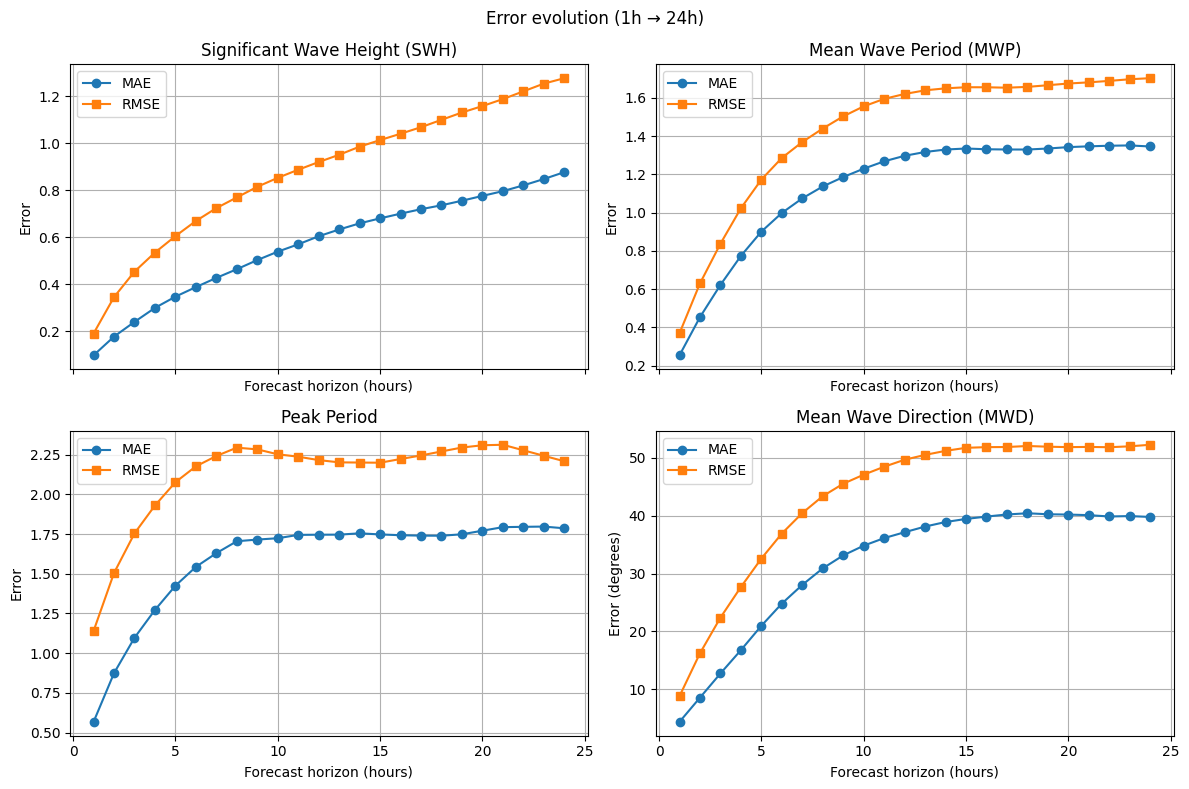

In [10]:

# -------------------------------
# Results table (only 24h)
# -------------------------------
if 24 not in set(horizons):
    raise ValueError(f"24h not in horizons: {list(horizons)}")

scalar_targets = ['swh_cop', 'mwp_cop', 'peak_period_cop']

mae_table = pd.DataFrame(index=horizons)
rmse_table = pd.DataFrame(index=horizons)

for tgt in scalar_targets:
    t_idx = wave_targets.index(tgt)
    mae_table[tgt] = mae_test[t_idx, :]
    rmse_table[tgt] = rmse_test[t_idx, :]

mae_table['mwd_deg'] = angular_mae
rmse_table['mwd_deg'] = angular_rmse

mae_table.index.name = 'Forecast_horizon_h'
rmse_table.index.name = 'Forecast_horizon_h'

results_table = pd.concat(
    [mae_table.add_prefix('MAE_'), rmse_table.add_prefix('RMSE_')],
    axis=1,
)

print("\n=== TEST SET – RESULTS @ 24h ===")
display(results_table.round(3))


# -------------------------------
# Error evolution (1h → 24h) per parameter
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.ravel()

plot_specs = [
    ('swh_cop', 'Significant Wave Height (SWH)', 'Error'),
    ('mwp_cop', 'Mean Wave Period (MWP)', 'Error'),
    ('peak_period_cop', 'Peak Period', 'Error'),
    ('mwd_deg', 'Mean Wave Direction (MWD)', 'Error (degrees)'),
]

for ax, (key, title, ylab) in zip(axes, plot_specs):
    if key == 'mwd_deg':
        mae = angular_mae
        rmse = angular_rmse
    else:
        t_idx = wave_targets.index(key)
        mae = mae_test[t_idx, :]
        rmse = rmse_test[t_idx, :]

    ax.plot(horizons, mae, marker='o', label='MAE')
    ax.plot(horizons, rmse, marker='s', label='RMSE')
    ax.set_title(title)
    ax.set_xlabel('Forecast horizon (hours)')
    ax.set_ylabel(ylab)
    ax.grid(True)
    ax.legend()

plt.suptitle('Error evolution (1h → 24h)')
plt.tight_layout()
plt.show()


### **15. Evolução temporal e comparação “24h à frente”**

Esta célula faz duas visualizações: (1) a evolução temporal “real” das variáveis no *test split*; (2) a comparação entre valores reais e previsões **24h à frente**, alinhando a previsão com o instante futuro correspondente. Para a direção, converte as componentes **sin/cos** para **graus** para facilitar a interpretação.

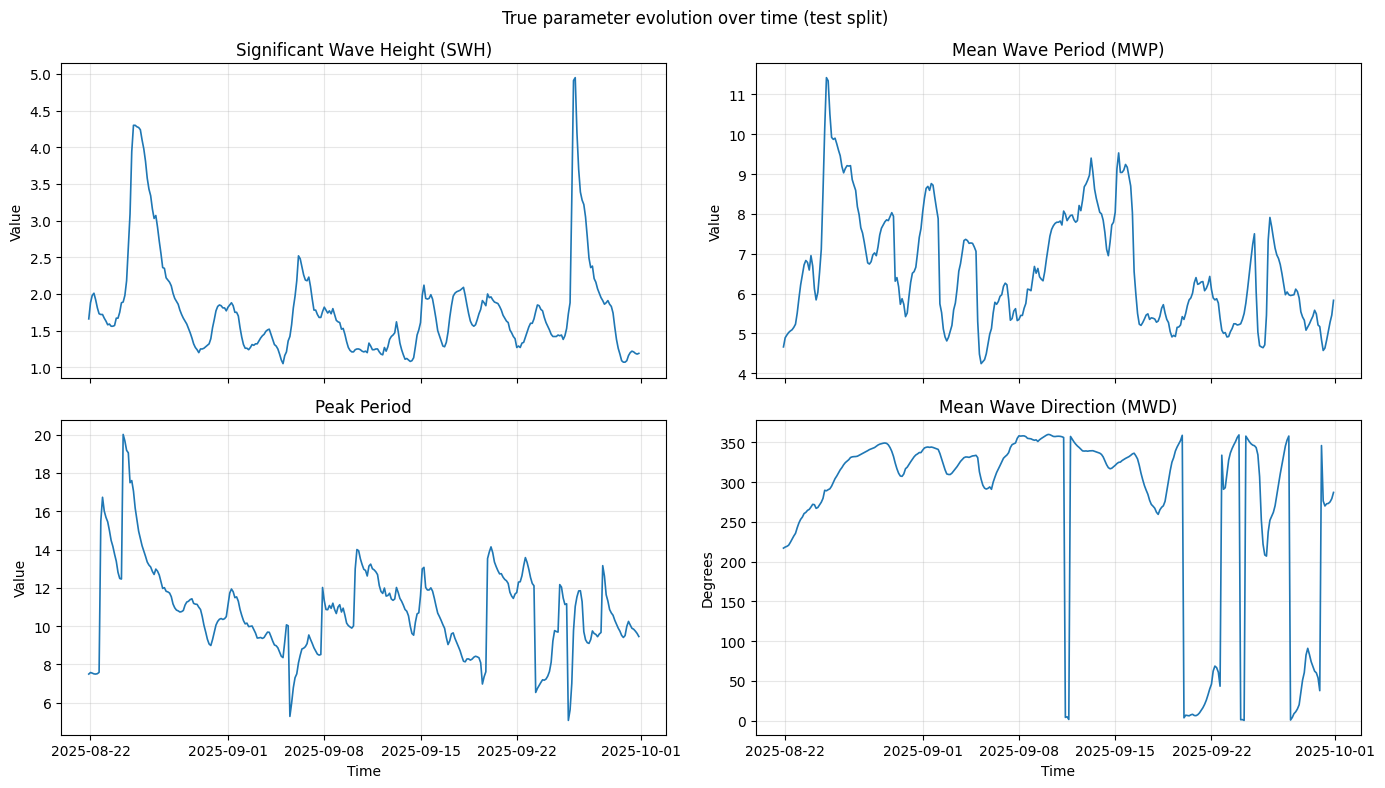

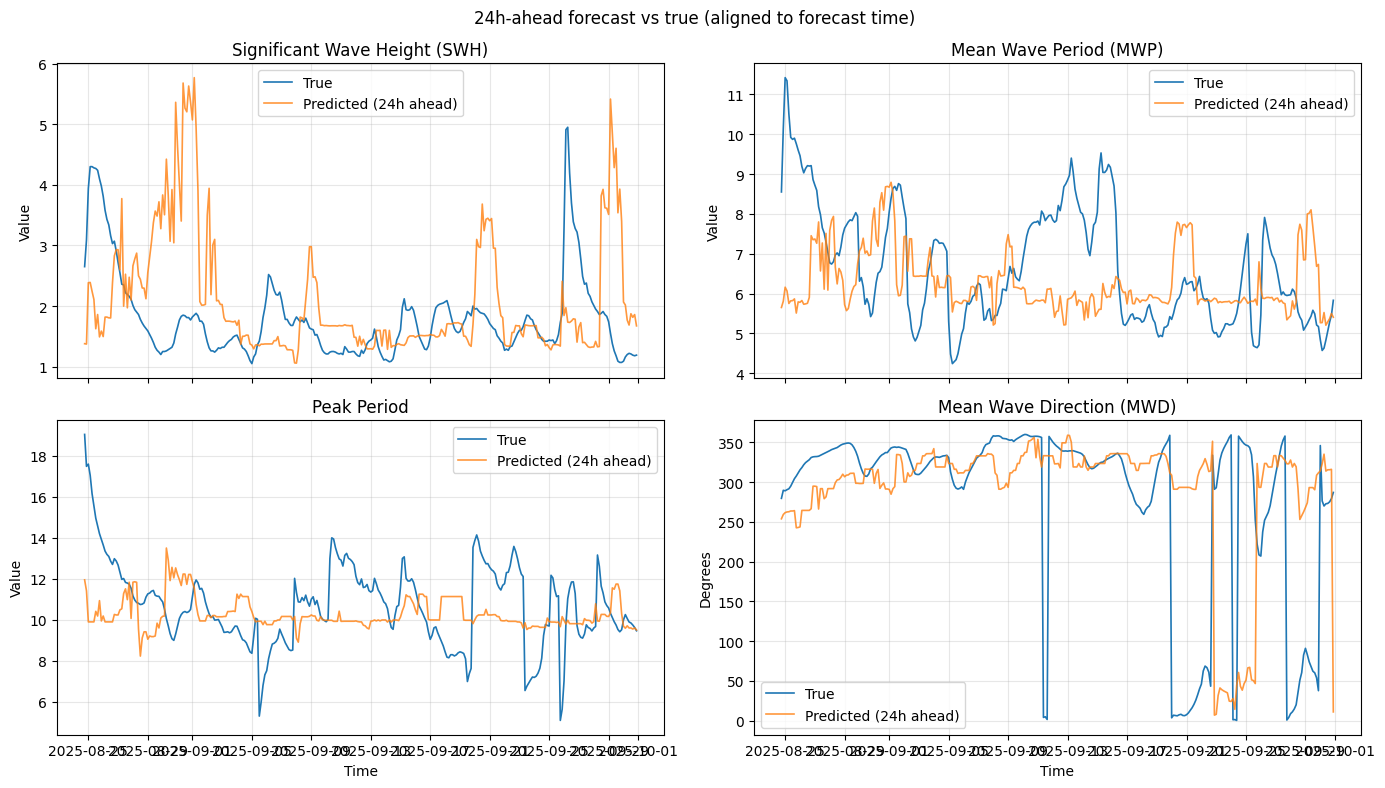

In [11]:

# -------------------------------
# Time evolution of parameters (test period)
# -------------------------------
# To keep plots readable, we only show the last N points of the test split.
N_PLOT = 2000

# Test timeline and true values
test_time = test['time'].reset_index(drop=True)
y_test_df = y_test.reset_index(drop=True)

# Convert direction sin/cos to degrees for plotting
idx_sin = wave_targets.index('mwd_cop_sin')
idx_cos = wave_targets.index('mwd_cop_cos')

true_mwd_deg = sincos_to_angle_deg(
    y_test_df.iloc[:, idx_sin].to_numpy(),
    y_test_df.iloc[:, idx_cos].to_numpy(),
)

# Slice last N points
start = max(0, len(test_time) - N_PLOT)
t_plot = test_time.iloc[start:]

# 1) True time-series evolution
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axes = axes.ravel()

series_specs = [
    ('swh_cop', 'Significant Wave Height (SWH)', 'Value'),
    ('mwp_cop', 'Mean Wave Period (MWP)', 'Value'),
    ('peak_period_cop', 'Peak Period', 'Value'),
    ('mwd_deg', 'Mean Wave Direction (MWD)', 'Degrees'),
]

for ax, (key, title, ylab) in zip(axes, series_specs):
    if key == 'mwd_deg':
        y = true_mwd_deg[start:]
    else:
        y = y_test_df[key].iloc[start:].to_numpy()

    ax.plot(t_plot, y, linewidth=1.2)
    ax.set_title(title)
    ax.set_ylabel(ylab)
    ax.grid(True, alpha=0.3)

axes[2].set_xlabel('Time')
axes[3].set_xlabel('Time')
plt.suptitle('True parameter evolution over time (test split)')
plt.tight_layout()
plt.show()


# -------------------------------
# Overlay 24h-ahead prediction vs true (aligned in time)
# -------------------------------
H_SHOW = 24
h_idx = H_SHOW - 1

if h_idx >= horizon:
    raise ValueError(f"H_SHOW={H_SHOW} is greater than horizon={horizon}.")

valid_n = len(y_test_df) - h_idx
if valid_n <= 0:
    raise ValueError("Not enough test samples to plot 24h-ahead alignment.")

# Align to the future time where the prediction applies
future_time = test_time.iloc[h_idx:].reset_index(drop=True)  # time at t+24h

y_true_h = y_test_df.iloc[h_idx:].to_numpy()          # truth at that future time
preds_h = all_preds[:valid_n, h_idx, :]               # forecasts produced 24h earlier

true_mwd_h = sincos_to_angle_deg(y_true_h[:, idx_sin], y_true_h[:, idx_cos])
pred_mwd_h = sincos_to_angle_deg(preds_h[:, idx_sin], preds_h[:, idx_cos])

# Slice last N points of the aligned series
start2 = max(0, len(future_time) - N_PLOT)
t2 = future_time.iloc[start2:]

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axes = axes.ravel()

overlay_specs = [
    ('swh_cop', 'Significant Wave Height (SWH)'),
    ('mwp_cop', 'Mean Wave Period (MWP)'),
    ('peak_period_cop', 'Peak Period'),
    ('mwd_deg', 'Mean Wave Direction (MWD)'),
]

for ax, (key, title) in zip(axes, overlay_specs):
    if key == 'mwd_deg':
        y_true = true_mwd_h[start2:]
        y_pred = pred_mwd_h[start2:]
        ylab = 'Degrees'
    else:
        t_idx = wave_targets.index(key)
        y_true = y_true_h[:, t_idx][start2:]
        y_pred = preds_h[:, t_idx][start2:]
        ylab = 'Value'

    ax.plot(t2, y_true, linewidth=1.2, label='True')
    ax.plot(t2, y_pred, linewidth=1.2, label='Predicted (24h ahead)', alpha=0.8)
    ax.set_title(title)
    ax.set_ylabel(ylab)
    ax.grid(True, alpha=0.3)
    ax.legend()

axes[2].set_xlabel('Time')
axes[3].set_xlabel('Time')
plt.suptitle('24h-ahead forecast vs true (aligned to forecast time)')
plt.tight_layout()
plt.show()


### **16. Estudo de influência (ERA5 vs Copernicus vs ambos)**

Esta célula treina o **mesmo modelo** em três cenários (só variáveis ERA5, só variáveis Copernicus que não são targets, e ERA5+Copernicus), usando o **mesmo split temporal**, e compara o desempenho no *test set* (MAE, RMSE e $R^2$). Se existir direção em sin/cos, também calcula erro **angular** e apresenta gráficos comparativos de RMSE.

--- Feature sets ---
ERA5 features:       7
Copernicus features: 2
Both:                9

--- Resultados (test) - Targets escalares ---


MAE                     RMSE                       R2  \
Scenario            COP    ERA5 ERA5+COP     COP    ERA5 ERA5+COP     COP   
Target                                                                      
mwp_cop          1.2819  0.4280   0.4376  1.5426  0.5901   0.5992 -0.1490   
peak_period_cop  1.8600  0.8688   0.9490  2.4651  1.6299   1.6936 -0.1293   
swh_cop          1.1132  0.0858   0.0895  1.3572  0.1107   0.1162 -2.9987   

                                  
Scenario           ERA5 ERA5+COP  
Target                            
mwp_cop          0.8319   0.8266  
peak_period_cop  0.5063   0.4670  
swh_cop          0.9734   0.9707


--- Resultados (test) - Direção (graus) ---


MAE_deg                 RMSE_deg                 
Scenario     COP   ERA5 ERA5+COP      COP    ERA5 ERA5+COP
Target                                                    
mwd_deg    43.06  7.063    7.314   54.199  14.496   14.354

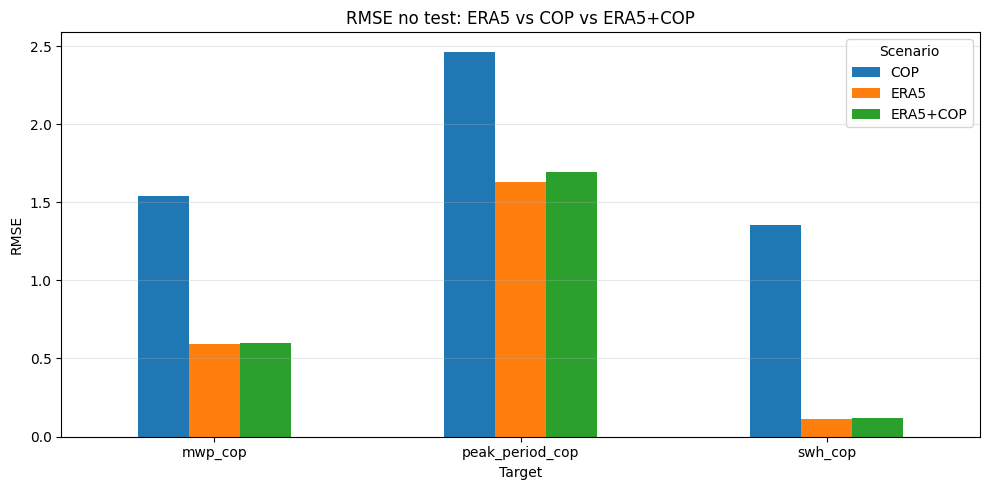

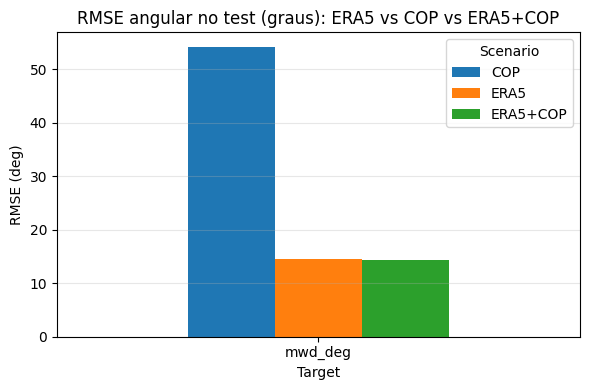

In [12]:
# =========================================================
# Estudo de influência: ERA5 vs Copernicus vs Ambos
# (mesmo split temporal e mesmo modelo)
# =========================================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def _rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))


def _safe_cols(df, cols):
    return [c for c in cols if c in df.columns]


# -------------------------------
# Dataset base (df_sync) + sanity checks
# -------------------------------
if 'df_sync' not in globals():
    raise NameError("df_sync não existe. Executa as células de preparação de dados primeiro.")

if 'time' not in df_sync.columns:
    raise ValueError("A coluna 'time' não existe em df_sync.")

work = df_sync.copy()
work['time'] = pd.to_datetime(work['time'], format='%d/%m/%Y %H:%M', errors='coerce')
work = work.dropna(subset=['time']).sort_values('time').reset_index(drop=True)

# Targets (ondas Copernicus)
targets_scalar = _safe_cols(work, ['swh_cop', 'mwp_cop', 'peak_period_cop'])
targets_dir = _safe_cols(work, ['mwd_cop_sin', 'mwd_cop_cos'])

if not targets_scalar and not targets_dir:
    raise ValueError("Não encontrei targets Copernicus esperados em df_sync.")

# Features: ERA5 = tudo o que contém '_era5'
features_era = [c for c in work.columns if '_era5' in c]

# Features: Copernicus (não-ondas) = tudo o que contém '_cop' EXCETO os targets de ondas
wave_target_cols = set(targets_scalar + targets_dir)
features_cop = [c for c in work.columns if ('_cop' in c) and (c not in wave_target_cols)]

# Remover colunas que nunca devem ser features
for bad in ['time']:
    if bad in features_era:
        features_era.remove(bad)
    if bad in features_cop:
        features_cop.remove(bad)

features_both = sorted(set(features_era + features_cop))

print('--- Feature sets ---')
print(f'ERA5 features:       {len(features_era)}')
print(f'Copernicus features: {len(features_cop)}')
print(f'Both:                {len(features_both)}')


# -------------------------------
# Split temporal (70/15/15)
# -------------------------------
train_end = work['time'].quantile(0.7)
val_end = work['time'].quantile(0.85)

train_df = work[work['time'] <= train_end]
val_df = work[(work['time'] > train_end) & (work['time'] <= val_end)]
test_df = work[work['time'] > val_end]


def fit_predict_gb(X_train, y_train, X_test):
    base = GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42,
    )
    base.fit(X_train, y_train)
    return base.predict(X_test)


def eval_scalar_target(target_name, feature_cols):
    cols = _safe_cols(work, feature_cols)

    X_train = train_df[cols]
    y_train = train_df[target_name]

    X_test = test_df[cols]
    y_test = test_df[target_name]

    y_pred = fit_predict_gb(X_train, y_train, X_test)

    return {
        'MAE': float(mean_absolute_error(y_test, y_pred)),
        'RMSE': _rmse(y_test, y_pred),
        'R2': float(r2_score(y_test, y_pred)),
    }


def eval_direction(feature_cols):
    # Prediz (sin, cos) e mede erro angular em graus
    if len(targets_dir) != 2:
        return None

    cols = _safe_cols(work, feature_cols)

    X_train = train_df[cols]
    Y_train = train_df[targets_dir]

    X_test = test_df[cols]
    Y_test = test_df[targets_dir]

    base = GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42,
    )
    m = MultiOutputRegressor(base)
    m.fit(X_train, Y_train)
    Y_pred = m.predict(X_test)

    idx_sin = targets_dir.index('mwd_cop_sin')
    idx_cos = targets_dir.index('mwd_cop_cos')

    true_deg = sincos_to_angle_deg(Y_test.to_numpy()[:, idx_sin], Y_test.to_numpy()[:, idx_cos])
    pred_deg = sincos_to_angle_deg(Y_pred[:, idx_sin], Y_pred[:, idx_cos])

    mae_deg = float(np.mean(angular_abs_error_deg(true_deg, pred_deg)))
    rmse_deg = float(circular_rmse(true_deg, pred_deg))

    return {
        'MAE_deg': mae_deg,
        'RMSE_deg': rmse_deg,
    }


# -------------------------------
# Run study
# -------------------------------
scenarios = {
    'ERA5': features_era,
    'COP': features_cop,
    'ERA5+COP': features_both,
}

rows = []

for tgt in targets_scalar:
    for name, feats in scenarios.items():
        metrics = eval_scalar_target(tgt, feats)
        rows.append({'Target': tgt, 'Scenario': name, **metrics})

# Direction as an extra target (if available)
dir_rows = []
dir_metrics = {}
if len(targets_dir) == 2:
    for name, feats in scenarios.items():
        dm = eval_direction(feats)
        if dm is not None:
            dir_rows.append({'Target': 'mwd_deg', 'Scenario': name, **dm})

results_scalar = pd.DataFrame(rows)
print('\n--- Resultados (test) - Targets escalares ---')
display(results_scalar.pivot(index='Target', columns='Scenario', values=['MAE', 'RMSE', 'R2']).round(4))

if dir_rows:
    results_dir = pd.DataFrame(dir_rows)
    print('\n--- Resultados (test) - Direção (graus) ---')
    display(results_dir.pivot(index='Target', columns='Scenario', values=['MAE_deg', 'RMSE_deg']).round(3))


# -------------------------------
# Plots (RMSE por cenário)
# -------------------------------
if not results_scalar.empty:
    pivot_rmse = results_scalar.pivot(index='Target', columns='Scenario', values='RMSE')
    ax = pivot_rmse.plot(kind='bar', figsize=(10, 5))
    ax.set_title('RMSE no test: ERA5 vs COP vs ERA5+COP')
    ax.set_ylabel('RMSE')
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

if dir_rows:
    pivot_rmse_deg = results_dir.pivot(index='Target', columns='Scenario', values='RMSE_deg')
    ax = pivot_rmse_deg.plot(kind='bar', figsize=(6, 4))
    ax.set_title('RMSE angular no test (graus): ERA5 vs COP vs ERA5+COP')
    ax.set_ylabel('RMSE (deg)')
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Analisar a influência do vento e das correntes nas previsões de ondas
Nesta secção vamos **quantificar a influência** de variáveis de **vento** (ERA5) e **correntes** (Copernicus) na previsão de características de onda (Copernicus):
- Treinar o mesmo modelo em 3 cenários: **Vento**, **Correntes**, **Vento+Correntes**
- Comparar métricas no *test set* (split temporal)
- Calcular **Permutation Importance** para medir a contribuição de cada variável (e por grupo: vento vs correntes)


--- Feature sets ---
Wind features:      ['u10_era5', 'v10_era5', 'wind_speed', 'wind_dir_sin', 'wind_dir_cos']
Current features:   ['uo_cop', 'vo_cop', 'curr_speed', 'curr_dir_sin', 'curr_dir_cos']
Wind+Current:      10 features

--- Split sizes ---
Train: 1529 Val: 327 Test: 328

--- Resultados (test) ---


MAE                      RMSE                        R2  \
Scenario           CURR    WIND WIND+CURR    CURR    WIND WIND+CURR    CURR   
Target                                                                        
mwp_cop          1.3423  1.0818    1.0801  1.6208  1.4514    1.4539 -0.2686   
peak_period_cop  1.9370  2.0090    2.0340  2.5276  2.6586    2.6679 -0.1873   
swh_cop          1.0734  0.5898    0.6429  1.3440  0.8369    0.9000 -2.9210   

                                  n_test                   
Scenario           WIND WIND+CURR   CURR   WIND WIND+CURR  
Target                                                     
mwp_cop         -0.0173   -0.0208  328.0  328.0     328.0  
peak_period_cop -0.3136   -0.3228  328.0  328.0     328.0  
swh_cop         -0.5204   -0.7584  328.0  328.0     328.0

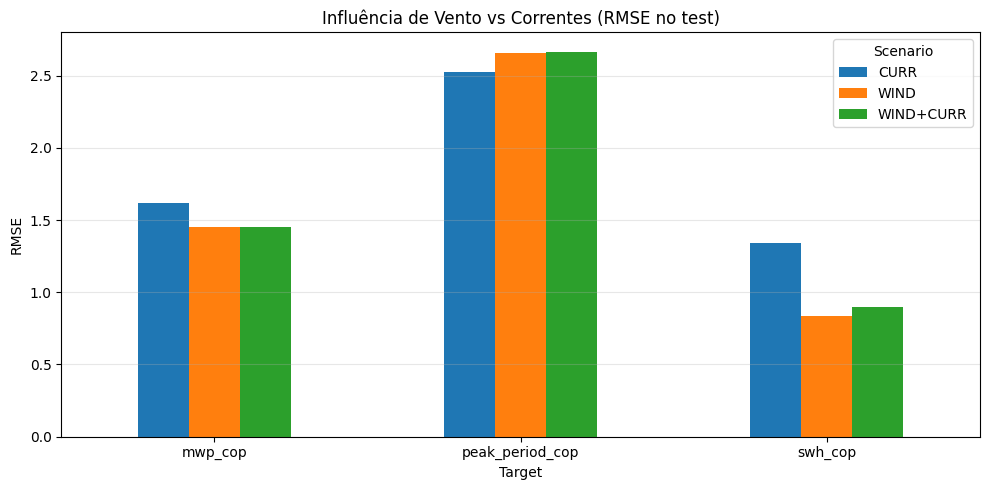


=== Permutation importance (target: swh_cop) ===


,feature,importance_rmse
9,wind_speed,0.074425
1,curr_dir_sin,0.057471
2,curr_speed,0.029113
0,curr_dir_cos,0.024655
7,wind_dir_cos,0.018935
6,vo_cop,0.011445
8,wind_dir_sin,0.011233
4,uo_cop,0.002787
5,v10_era5,-0.017965
3,u10_era5,-0.020399



--- Importância por grupo (soma) ---


,importance_rmse_sum
curr,0.125471
wind,0.066229


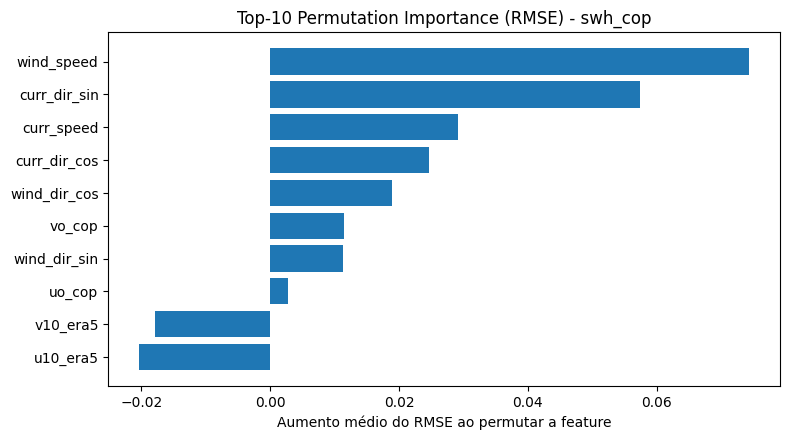


=== Permutation importance (target: mwp_cop) ===


,feature,importance_rmse
9,wind_speed,0.259017
1,curr_dir_sin,0.077931
7,wind_dir_cos,0.039672
0,curr_dir_cos,0.038075
2,curr_speed,0.018377
4,uo_cop,0.016166
6,vo_cop,-0.007705
3,u10_era5,-0.009337
5,v10_era5,-0.020248
8,wind_dir_sin,-0.040014



--- Importância por grupo (soma) ---


,importance_rmse_sum
wind,0.229090
curr,0.142843


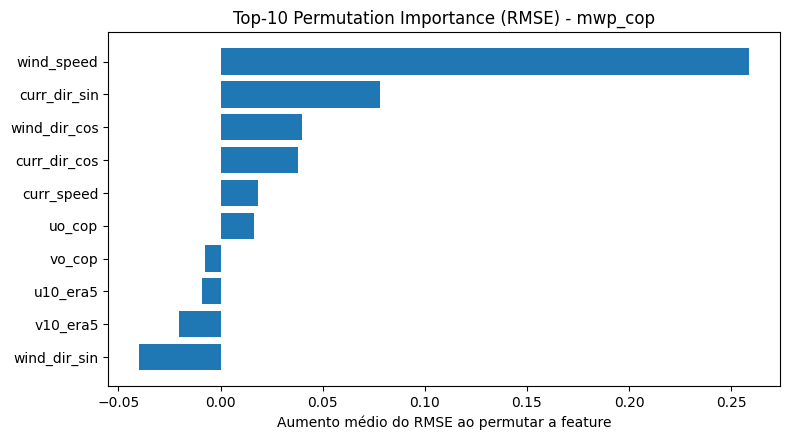


=== Permutation importance (target: peak_period_cop) ===


,feature,importance_rmse
7,wind_dir_cos,0.075570
6,vo_cop,0.041415
1,curr_dir_sin,0.021604
3,u10_era5,0.008313
2,curr_speed,0.002182
4,uo_cop,0.002120
5,v10_era5,-0.000662
9,wind_speed,-0.030998
0,curr_dir_cos,-0.033386
8,wind_dir_sin,-0.072613



--- Importância por grupo (soma) ---


,importance_rmse_sum
curr,0.033936
wind,-0.020390


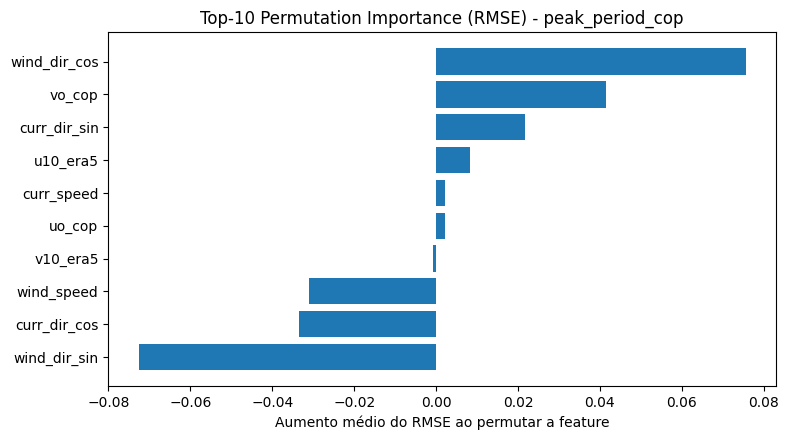

In [13]:
# =========================================================
# Influência de Vento (ERA5) e Correntes (Copernicus)
# nas previsões de características das ondas (Copernicus)
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance


def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))


def safe_cols(df, cols):
    return [c for c in cols if c in df.columns]


def add_uv_features(df, u_col, v_col, prefix):
    """Cria speed e direção (sin/cos) a partir de componentes u/v."""
    out = df.copy()
    if u_col not in out.columns or v_col not in out.columns:
        return out

    u = out[u_col].astype(float)
    v = out[v_col].astype(float)
    out[f"{prefix}_speed"] = np.sqrt(u**2 + v**2)
    # direção meteorológica/oceanográfica pode variar por convenção; aqui usamos ângulo matemático do vetor (u,v)
    ang = np.arctan2(v, u)  # [-pi, pi]
    out[f"{prefix}_dir_sin"] = np.sin(ang)
    out[f"{prefix}_dir_cos"] = np.cos(ang)
    return out


# -------------------------------
# Dataset base (df_sync)
# -------------------------------
if 'df_sync' not in globals():
    raise NameError("df_sync não existe. Executa as células de preparação de dados primeiro.")

work = df_sync.copy()
if 'time' not in work.columns:
    raise ValueError("A coluna 'time' não existe em df_sync.")

work['time'] = pd.to_datetime(work['time'], format='%d/%m/%Y %H:%M', errors='coerce')
work = work.dropna(subset=['time']).sort_values('time').reset_index(drop=True)

# -------------------------------
# Definir variáveis de interesse
# -------------------------------
# Vento (ERA5) - componentes a 10m
wind_u = 'u10_era5'
wind_v = 'v10_era5'

# Correntes (Copernicus) - componentes (surface current)
cur_u = 'uo_cop'
cur_v = 'vo_cop'

missing_core = [c for c in [wind_u, wind_v, cur_u, cur_v] if c not in work.columns]
if missing_core:
    print("Aviso: faltam colunas esperadas:", missing_core)
    print("Vou tentar continuar com o que existir.")

# Criar features derivadas (speed e direção)
work = add_uv_features(work, wind_u, wind_v, prefix='wind')
work = add_uv_features(work, cur_u, cur_v, prefix='curr')

wind_features = safe_cols(work, [wind_u, wind_v, 'wind_speed', 'wind_dir_sin', 'wind_dir_cos'])
curr_features = safe_cols(work, [cur_u, cur_v, 'curr_speed', 'curr_dir_sin', 'curr_dir_cos'])
both_features = sorted(set(wind_features + curr_features))

print('--- Feature sets ---')
print('Wind features:     ', wind_features)
print('Current features:  ', curr_features)
print(f'Wind+Current:      {len(both_features)} features')

# Targets (ondas Copernicus)
targets_scalar = safe_cols(work, ['swh_cop', 'mwp_cop', 'peak_period_cop'])
if not targets_scalar:
    raise ValueError("Não encontrei targets escalares Copernicus: 'swh_cop', 'mwp_cop', 'peak_period_cop'.")

# -------------------------------
# Split temporal (70/15/15)
# -------------------------------
train_end = work['time'].quantile(0.7)
val_end = work['time'].quantile(0.85)

train_df = work[work['time'] <= train_end]
val_df = work[(work['time'] > train_end) & (work['time'] <= val_end)]
test_df = work[work['time'] > val_end]

print('\n--- Split sizes ---')
print('Train:', len(train_df), 'Val:', len(val_df), 'Test:', len(test_df))

# -------------------------------
# Modelo + avaliação
# -------------------------------
def fit_predict_gb(X_train, y_train, X_test):
    model = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('gb', GradientBoostingRegressor(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=3,
            random_state=42,
        )),
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred


def eval_target(target, features):
    feats = safe_cols(work, features)
    if not feats:
        return None

    X_train = train_df[feats]
    y_train = train_df[target]
    X_test = test_df[feats]
    y_test = test_df[target]

    # remover linhas com y NaN
    train_mask = ~y_train.isna()
    test_mask = ~y_test.isna()
    X_train = X_train.loc[train_mask]
    y_train = y_train.loc[train_mask]
    X_test = X_test.loc[test_mask]
    y_test = y_test.loc[test_mask]

    model, y_pred = fit_predict_gb(X_train, y_train, X_test)
    metrics = {
        'MAE': float(mean_absolute_error(y_test, y_pred)),
        'RMSE': rmse(y_test, y_pred),
        'R2': float(r2_score(y_test, y_pred)),
        'n_test': int(len(y_test)),
    }
    return model, metrics, (X_test, y_test)


scenarios = {
    'WIND': wind_features,
    'CURR': curr_features,
    'WIND+CURR': both_features,
}

rows = []
models = {}
test_sets = {}

for tgt in targets_scalar:
    for sc_name, feats in scenarios.items():
        out = eval_target(tgt, feats)
        if out is None:
            continue
        model, metrics, (X_test, y_test) = out
        rows.append({'Target': tgt, 'Scenario': sc_name, **metrics})
        models[(tgt, sc_name)] = model
        test_sets[(tgt, sc_name)] = (X_test, y_test)

results = pd.DataFrame(rows)
print('\n--- Resultados (test) ---')
display(results.pivot(index='Target', columns='Scenario', values=['MAE', 'RMSE', 'R2', 'n_test']).round(4))

# Plot RMSE por cenário
pivot_rmse = results.pivot(index='Target', columns='Scenario', values='RMSE')
ax = pivot_rmse.plot(kind='bar', figsize=(10, 5))
ax.set_title('Influência de Vento vs Correntes (RMSE no test)')
ax.set_ylabel('RMSE')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# -------------------------------
# Permutation importance (WIND+CURR)
# - Mede influência por variável e por grupo (vento vs correntes)
# -------------------------------
def group_importance(imp, feature_names, groups):
    # groups: dict(name -> set(feature_names))
    out = {}
    for g, cols in groups.items():
        mask = [f in cols for f in feature_names]
        out[g] = float(np.sum(imp[mask]))
    return out

groups = {
    'wind': set(wind_features),
    'curr': set(curr_features),
}

for tgt in targets_scalar:
    key = (tgt, 'WIND+CURR')
    if key not in models:
        continue

    model = models[key]
    X_test, y_test = test_sets[key]
    feats = list(X_test.columns)

    # Para acelerar (se necessário), podes reduzir amostra
    # X_test_pi = X_test.sample(n=min(2000, len(X_test)), random_state=42)
    # y_test_pi = y_test.loc[X_test_pi.index]
    X_test_pi = X_test
    y_test_pi = y_test

    pi = permutation_importance(
        model,
        X_test_pi,
        y_test_pi,
        scoring='neg_root_mean_squared_error',
        n_repeats=10,
        random_state=42,
        n_jobs=-1,
    )

    imp = pi.importances_mean
    imp_df = pd.DataFrame({
        'feature': feats,
        'importance_rmse': imp,
    }).sort_values('importance_rmse', ascending=False)

    grp = group_importance(imp, feats, groups)
    grp_df = pd.DataFrame([grp]).T.rename(columns={0: 'importance_rmse_sum'})
    grp_df = grp_df.sort_values('importance_rmse_sum', ascending=False)

    print(f"\n=== Permutation importance (target: {tgt}) ===")
    display(imp_df.head(15))
    print("\n--- Importância por grupo (soma) ---")
    display(grp_df)

    # Plot top-10 features
    top = imp_df.head(10).iloc[::-1]
    plt.figure(figsize=(8, 4.5))
    plt.barh(top['feature'], top['importance_rmse'])
    plt.title(f'Top-10 Permutation Importance (RMSE) - {tgt}')
    plt.xlabel('Aumento médio do RMSE ao permutar a feature')
    plt.tight_layout()
    plt.show()

### **18. Otimização de hiperparâmetros (Grid Search)**

Esta célula usa `GridSearchCV` para procurar a melhor combinação de hiperparâmetros do `GradientBoostingRegressor` (ex.: `n_estimators`, `learning_rate`, `max_depth`, etc.), recorrendo a validação cruzada (`cv=5`) e escolhendo a configuração que minimiza o erro quadrático médio (via `neg_mean_squared_error`).

In [14]:
from sklearn.model_selection import GridSearchCV
X_train = train.drop(columns=X_cols_to_drop)
y_train = train[wave_targets]
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train.iloc[:,[1]], y_train.iloc[:,[1]])
print(f"Best params: {grid_search.best_params_}")

Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}


c:\Users\danip\miniconda3\envs\advanced-automation\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
